   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Initial missing values: 0
Training set size: (614, 8)
Testing set size: (154, 8)
Perceptron Accuracy with Polynomial Features:0.7143
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        99
           1       0.62      0.51      0.56        55

    ac

<Figure size 800x600 with 0 Axes>

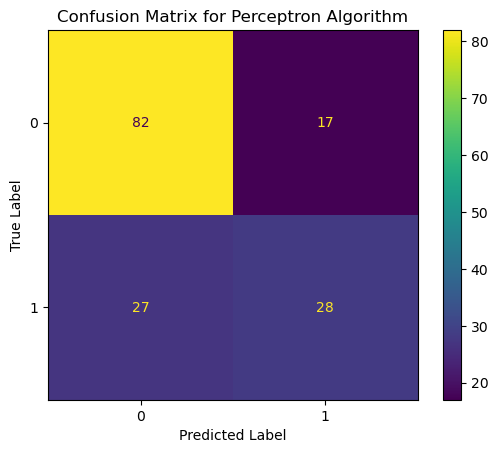

Accuracy with class weights: 0.7013
              precision    recall  f1-score   support

           0       0.71      0.90      0.79        99
           1       0.66      0.35      0.45        55

    accuracy                           0.70       154
   macro avg       0.68      0.62      0.62       154
weighted avg       0.69      0.70      0.67       154



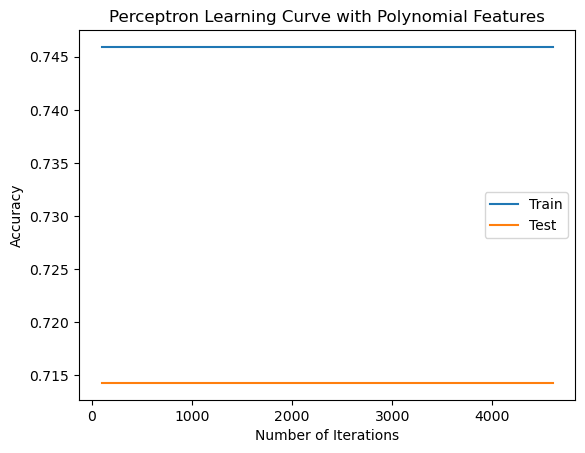

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Load and inspect data
data = pd.read_csv('diabetes.csv')
print(data.head())
print("Initial missing values:", data.isnull().sum().sum())

# Preprocessing
scaler = StandardScaler()
X = data.drop(columns=['Outcome'])
y = data['Outcome']
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Perceptron with Polynomial Features
perceptron = Perceptron(max_iter=2000, tol=1e-3, random_state=42)
perceptron.fit(X_train_poly, y_train)
y_pred_perc = perceptron.predict(X_test_poly)
print(f"Perceptron Accuracy with Polynomial Features:{accuracy_score(y_test, y_pred_perc):.4f}")
print(classification_report(y_test, y_pred_perc))

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_perc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Display the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(values_format='d', cmap='viridis')
plt.title('Confusion Matrix for Perceptron Algorithm')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Class Weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
perceptron = Perceptron(max_iter=2000, tol=1e-3, class_weight=class_weights_dict, random_state=42)
perceptron.fit(X_train_poly, y_train)
y_pred_weighted = perceptron.predict(X_test_poly)
print(f"Accuracy with class weights: {accuracy_score(y_test, y_pred_weighted):.4f}")
print(classification_report(y_test, y_pred_weighted))

# Learning Curve Visualization
train_scores, test_scores = [], []
iterations = range(100, 5100, 500)
for max_iter in iterations:
    perceptron = Perceptron(max_iter=max_iter, eta0=0.01, tol=1e-3, random_state=42)
    perceptron.fit(X_train_poly, y_train)
    train_scores.append(perceptron.score(X_train_poly, y_train)) 
    test_scores.append(perceptron.score(X_test_poly, y_test))

plt.plot(iterations, train_scores, label='Train') 
plt.plot(iterations, test_scores, label='Test') 
plt.xlabel('Number of Iterations') 
plt.ylabel('Accuracy') 
plt.title('Perceptron Learning Curve with Polynomial Features') 
plt.legend() 
plt.show()


In [10]:
# Check class distribution
class_counts = y.value_counts()
print("Class distribution:\n", class_counts)

Class distribution:
 Outcome
0    500
1    268
Name: count, dtype: int64


In [13]:
# Apply SMOTE only if there's significant imbalance
if min(y_train.value_counts()) / max(y_train.value_counts()) < 0.5:
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_poly, y_train)
    print("Class distribution after SMOTE:", np.bincount(y_train_smote))

    # Train Perceptron with SMOTE-applied data
    perceptron.fit(X_train_smote, y_train_smote)
    y_pred_perc_smote = perceptron.predict(X_test_poly)
    print("Perceptron Accuracy with SMOTE:", accuracy_score(y_test, y_pred_perc_smote))
    print(classification_report(y_test, y_pred_perc_smote))
else:
    print("No significant imbalance detected; proceeding without SMOTE.")

No significant imbalance detected; proceeding without SMOTE.
